Agent(동그라미)가 미로의 goal에 도착해야 한다
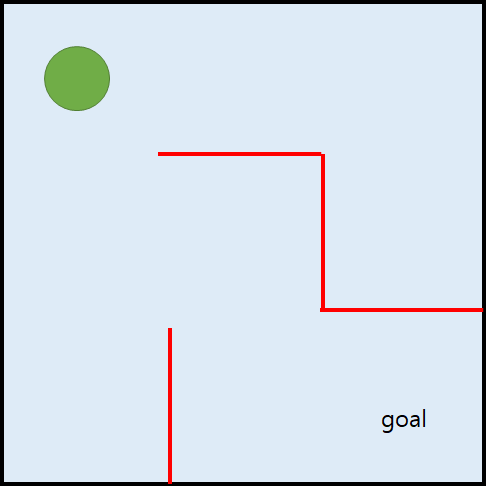

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 초기 상태의 미로 모습

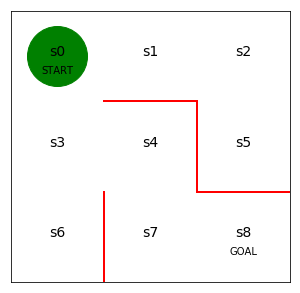

In [15]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

# 붉은 벽
plt.plot([1,1], [0,1], color='red', linewidth=2)
plt.plot([1,2], [2,2], color='red', linewidth=2)
plt.plot([2,2], [2,1], color='red', linewidth=2)
plt.plot([2,3], [1,1], color='red', linewidth=2)

# 각 state 표현
plt.text(0.5, 2.5, 's0', size=14, ha ='center')
plt.text(1.5, 2.5, 's1', size=14, ha ='center')
plt.text(2.5, 2.5, 's2', size=14, ha ='center')
plt.text(0.5, 1.5, 's3', size=14, ha ='center')
plt.text(1.5, 1.5, 's4', size=14, ha ='center')
plt.text(2.5, 1.5, 's5', size=14, ha ='center')
plt.text(0.5, 0.5, 's6', size=14, ha ='center')
plt.text(1.5, 0.5, 's7', size=14, ha ='center')
plt.text(2.5, 0.5, 's8', size=14, ha ='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 그림 범위 및 눈금 제거
ax.set_xlim(0.0,3.0)
ax.set_ylim(0.0,3.0)
plt.tick_params(axis='both',which='both', bottom=False, top=False,
               labelbottom=False, right=False, left=False, labelleft=False)

# agent(원)
line, = ax.plot([0.5],[2.5], marker="o",color='g', markersize=60)

#### agent 구현

- 정책π은 다양한 방법으로 나타낼 수 있다. 함수로 나타낼 수도 있고 신경망으로도 가능하다. 지금은 표로 만드는 방법을 다룬다

In [21]:
# 정책을 결정하는 파라미터의 초깃값 theta_0을 설정

# 행은 state, 열은 action 방향(상, 우, 하, 좌)
theta_0 = np.array([[np.nan, 1, 1, np.nan],
                   [np.nan, 1, np.nan, 1],
                   [np.nan, np.nan, 1, 1],
                   [1, 1, 1, np.nan],
                   [np.nan, np.nan, 1, 1],
                   [1, np.nan, np.nan, np.nan],
                   [1, np.nan, np.nan, np.nan],
                   [1, 1, np.nan, np.nan]]) #s8은 목표 지점이라 정책이 없다

In [22]:
# 정책 파라미터 theta를 행동 정책 pi로 변환하는 함수

def conv_theta(theta):
    [m,n] = theta.shape
    pi = np.zeros((m,n))
    for i in range(0, m):
        pi[i, :] = theta[i, :]/np.nansum(theta[i, :])
    pi = np.nan_to_num(pi) # nan을 0으로 변환
    return pi

In [26]:
print(theta_0.shape)

(8, 4)


In [23]:
# 초기 정책 pi_0
pi_0 = conv_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [32]:
# 1단계 이동 후의 상태 s 계산
def get_next_s(pi, s):
    direction = ['up', 'right', 'down','left']
    next_direct = np.random.choice(direction, p=pi[s,:])
    
    if next_direct == 'up':
        s_next = s - 3
    elif next_direct == 'right':
        s_next = s + 1
    elif next_direct == 'down':
        s_next = s +3
    elif next_direct == 'left':
        s_next = s - 1
    
    return s_next

In [33]:
# 목표 지점에 이를 때까지 에이전트를 이동

def goal(pi):
    s = 0
    state_history = []
    
    while True:
        next_s = get_next_s(pi, s)
        state_history.append(next_s)
        
        if next_s == 8 :
            break
        else:
            s = next_s
    
    return state_history
        

In [34]:
# 미로 안 이동
state_history  = goal(pi_0)

In [43]:
print(state_history)
print("목표 지점까지 걸린 단계 수 :" + str(len(state_history)-1))

[1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 3, 6, 3, 6, 3, 6, 3, 0, 1, 0, 1, 0, 3, 4, 7, 8]
목표 지점까지 걸린 단계 수 :25


In [44]:
# agent의 이동 시각화
from matplotlib import animation
from IPython.display import HTML

def init():
    '''배경 이미지 초기화'''
    line.set_data([],[])
    return (line,)

def animate(i):
    '''프레임 단위로 이미지 생성'''
    state = state_history[i]
    x = (state % 3) + 0.5 # x 좌표
    y = 2.5 - int(state/3) # y 좌표
    line.set_data(x,y)
    return (line, )

anim = animation.FuncAnimation(fig, animate, init_func=init,
                              frames = len(state_history),
                              interval = 200, repeat=False)

HTML(anim.to_jshtml())
    